In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_columns', None)

In [116]:
with open('/home/uzokmurod/Desktop/amaliyot/book recommendation sysrem/config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)
    
raw_data = config['data']['url_books']
raw_tags = config['data']['url_tags']
raw_read = config['data']['url_read']
raw_tags_id = config['data']['url_tags_id']
raw_rating = config['data']['url_rating']

df = pd.read_csv(raw_data)
df_tags= pd.read_csv(raw_tags)
df_read = pd.read_csv(raw_read)
df_tagsid = pd.read_csv(raw_tags_id)
df_rating = pd.read_csv(raw_rating)


In [117]:
df_rating.shape

(981756, 3)

In [118]:
df_col = pd.DataFrame(df.columns)

In [119]:
df_col

0
0                          id
1                     book_id
2                best_book_id
3                     work_id
4                 books_count
5                        isbn
6                      isbn13
7                     authors
8   original_publication_year
9              original_title
10                      title
11              language_code
12             average_rating
13              ratings_count
14         work_ratings_count
15    work_text_reviews_count
16                  ratings_1
17                  ratings_2
18                  ratings_3
19                  ratings_4
20                  ratings_5
21                  image_url
22            small_image_url

In [120]:
df_read.shape

(912705, 2)

In [121]:
df.head()

id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  \
0                          The Hunger Games   
1  Harry Potter and the Philosopher's Stone   
2                                  Twilight   
3                     To Kill a Mockingbird   
4                          The Great Gatsby   

                                               title language_code  \
0            The Hunger Games (The Hunger Games, #1)           eng   
1  Harry Potter and the Sorcerer's Stone (Harry P...           eng   
2                            Twilight (Twilight, #1)         en-US   
3                              To Kill a Mockingbird           eng   
4                                   The Great Gatsby           eng   

   average_rating  ratings_count  work_ratings_count  work_text_reviews_count  \
0            4.34        4780653             4942365                   155254   
1            4.44        4602479             4800065                    75867   
2            3.57        3866839             3916824                    95009   
3            4.25        3198671             3340896                    72586   
4            3.89        2683664             2773745                    51992   

   ratings_1  ratings_2  ratings_3  ratings_4  ratings_5  \
0      66715     127936     560092    1481305    2706317   
1      75504     101676     455024    1156318    3011543   
2     456191     436802     793319     875073    1355439   
3      60427     117415     446835    1001952    1714267   
4      86236     197621     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...

In [122]:
df.describe()

id       book_id  best_book_id       work_id   books_count  \
count  10000.00000  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000   
mean    5000.50000  5.264697e+06  5.471214e+06  8.646183e+06     75.712700   
std     2886.89568  7.575462e+06  7.827330e+06  1.175106e+07    170.470728   
min        1.00000  1.000000e+00  1.000000e+00  8.700000e+01      1.000000   
25%     2500.75000  4.627575e+04  4.791175e+04  1.008841e+06     23.000000   
50%     5000.50000  3.949655e+05  4.251235e+05  2.719524e+06     40.000000   
75%     7500.25000  9.382225e+06  9.636112e+06  1.451775e+07     67.000000   
max    10000.00000  3.328864e+07  3.553423e+07  5.639960e+07   3455.000000   

             isbn13  original_publication_year  average_rating  ratings_count  \
count  9.415000e+03                9979.000000    10000.000000   1.000000e+04   
mean   9.755044e+12                1981.987674        4.002191   5.400124e+04   
std    4.428619e+11                 152.576665        0.254427   1.573700e+05   
min    1.951703e+08               -1750.000000        2.470000   2.716000e+03   
25%    9.780316e+12                1990.000000        3.850000   1.356875e+04   
50%    9.780452e+12                2004.000000        4.020000   2.115550e+04   
75%    9.780831e+12                2011.000000        4.180000   4.105350e+04   
max    9.790008e+12                2017.000000        4.820000   4.780653e+06   

       work_ratings_count  work_text_reviews_count      ratings_1  \
count        1.000000e+04             10000.000000   10000.000000   
mean         5.968732e+04              2919.955300    1345.040600   
std          1.678038e+05              6124.378132    6635.626263   
min          5.510000e+03                 3.000000      11.000000   
25%          1.543875e+04               694.000000     196.000000   
50%          2.383250e+04              1402.000000     391.000000   
75%          4.591500e+04              2744.250000     885.000000   
max          4.942365e+06            155254.000000  456191.000000   

           ratings_2      ratings_3     ratings_4     ratings_5  
count   10000.000000   10000.000000  1.000000e+04  1.000000e+04  
mean     3110.885000   11475.893800  1.996570e+04  2.378981e+04  
std      9717.123578   28546.449183  5.144736e+04  7.976889e+04  
min        30.000000     323.000000  7.500000e+02  7.540000e+02  
25%       656.000000    3112.000000  5.405750e+03  5.334000e+03  
50%      1163.000000    4894.000000  8.269500e+03  8.836000e+03  
75%      2353.250000    9287.000000  1.602350e+04  1.730450e+04  
max    436802.000000  793319.000000  1.481305e+06  3.011543e+06

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [124]:
df.drop_duplicates(inplace=True)

In [125]:
df.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [126]:
titles = " ".join(x for x in df.title.astype(str))
titles

'The Hunger Games (The Hunger Games, #1) Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1) Twilight (Twilight, #1) To Kill a Mockingbird The Great Gatsby The Fault in Our Stars The Hobbit The Catcher in the Rye Angels & Demons  (Robert Langdon, #1) Pride and Prejudice The Kite Runner Divergent (Divergent, #1) 1984 Animal Farm The Diary of a Young Girl The Girl with the Dragon Tattoo (Millennium, #1) Catching Fire (The Hunger Games, #2) Harry Potter and the Prisoner of Azkaban (Harry Potter, #3) The Fellowship of the Ring (The Lord of the Rings, #1) Mockingjay (The Hunger Games, #3) Harry Potter and the Order of the Phoenix (Harry Potter, #5) The Lovely Bones Harry Potter and the Chamber of Secrets (Harry Potter, #2) Harry Potter and the Goblet of Fire (Harry Potter, #4) Harry Potter and the Deathly Hallows (Harry Potter, #7) The Da Vinci Code (Robert Langdon, #2) Harry Potter and the Half-Blood Prince (Harry Potter, #6) Lord of the Flies Romeo and Juliet Gone Girl The Help Of M

In [127]:
stopwords = set(STOPWORDS)


In [128]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=900, height=500)

In [129]:
wordcloud.generate(titles)

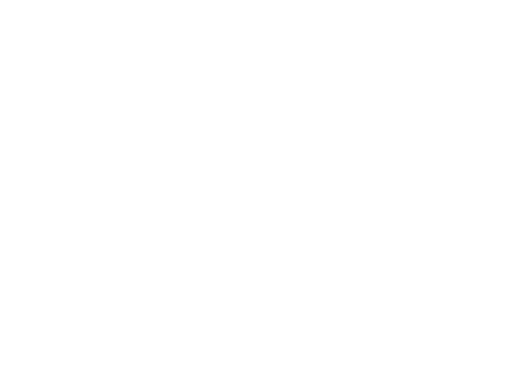

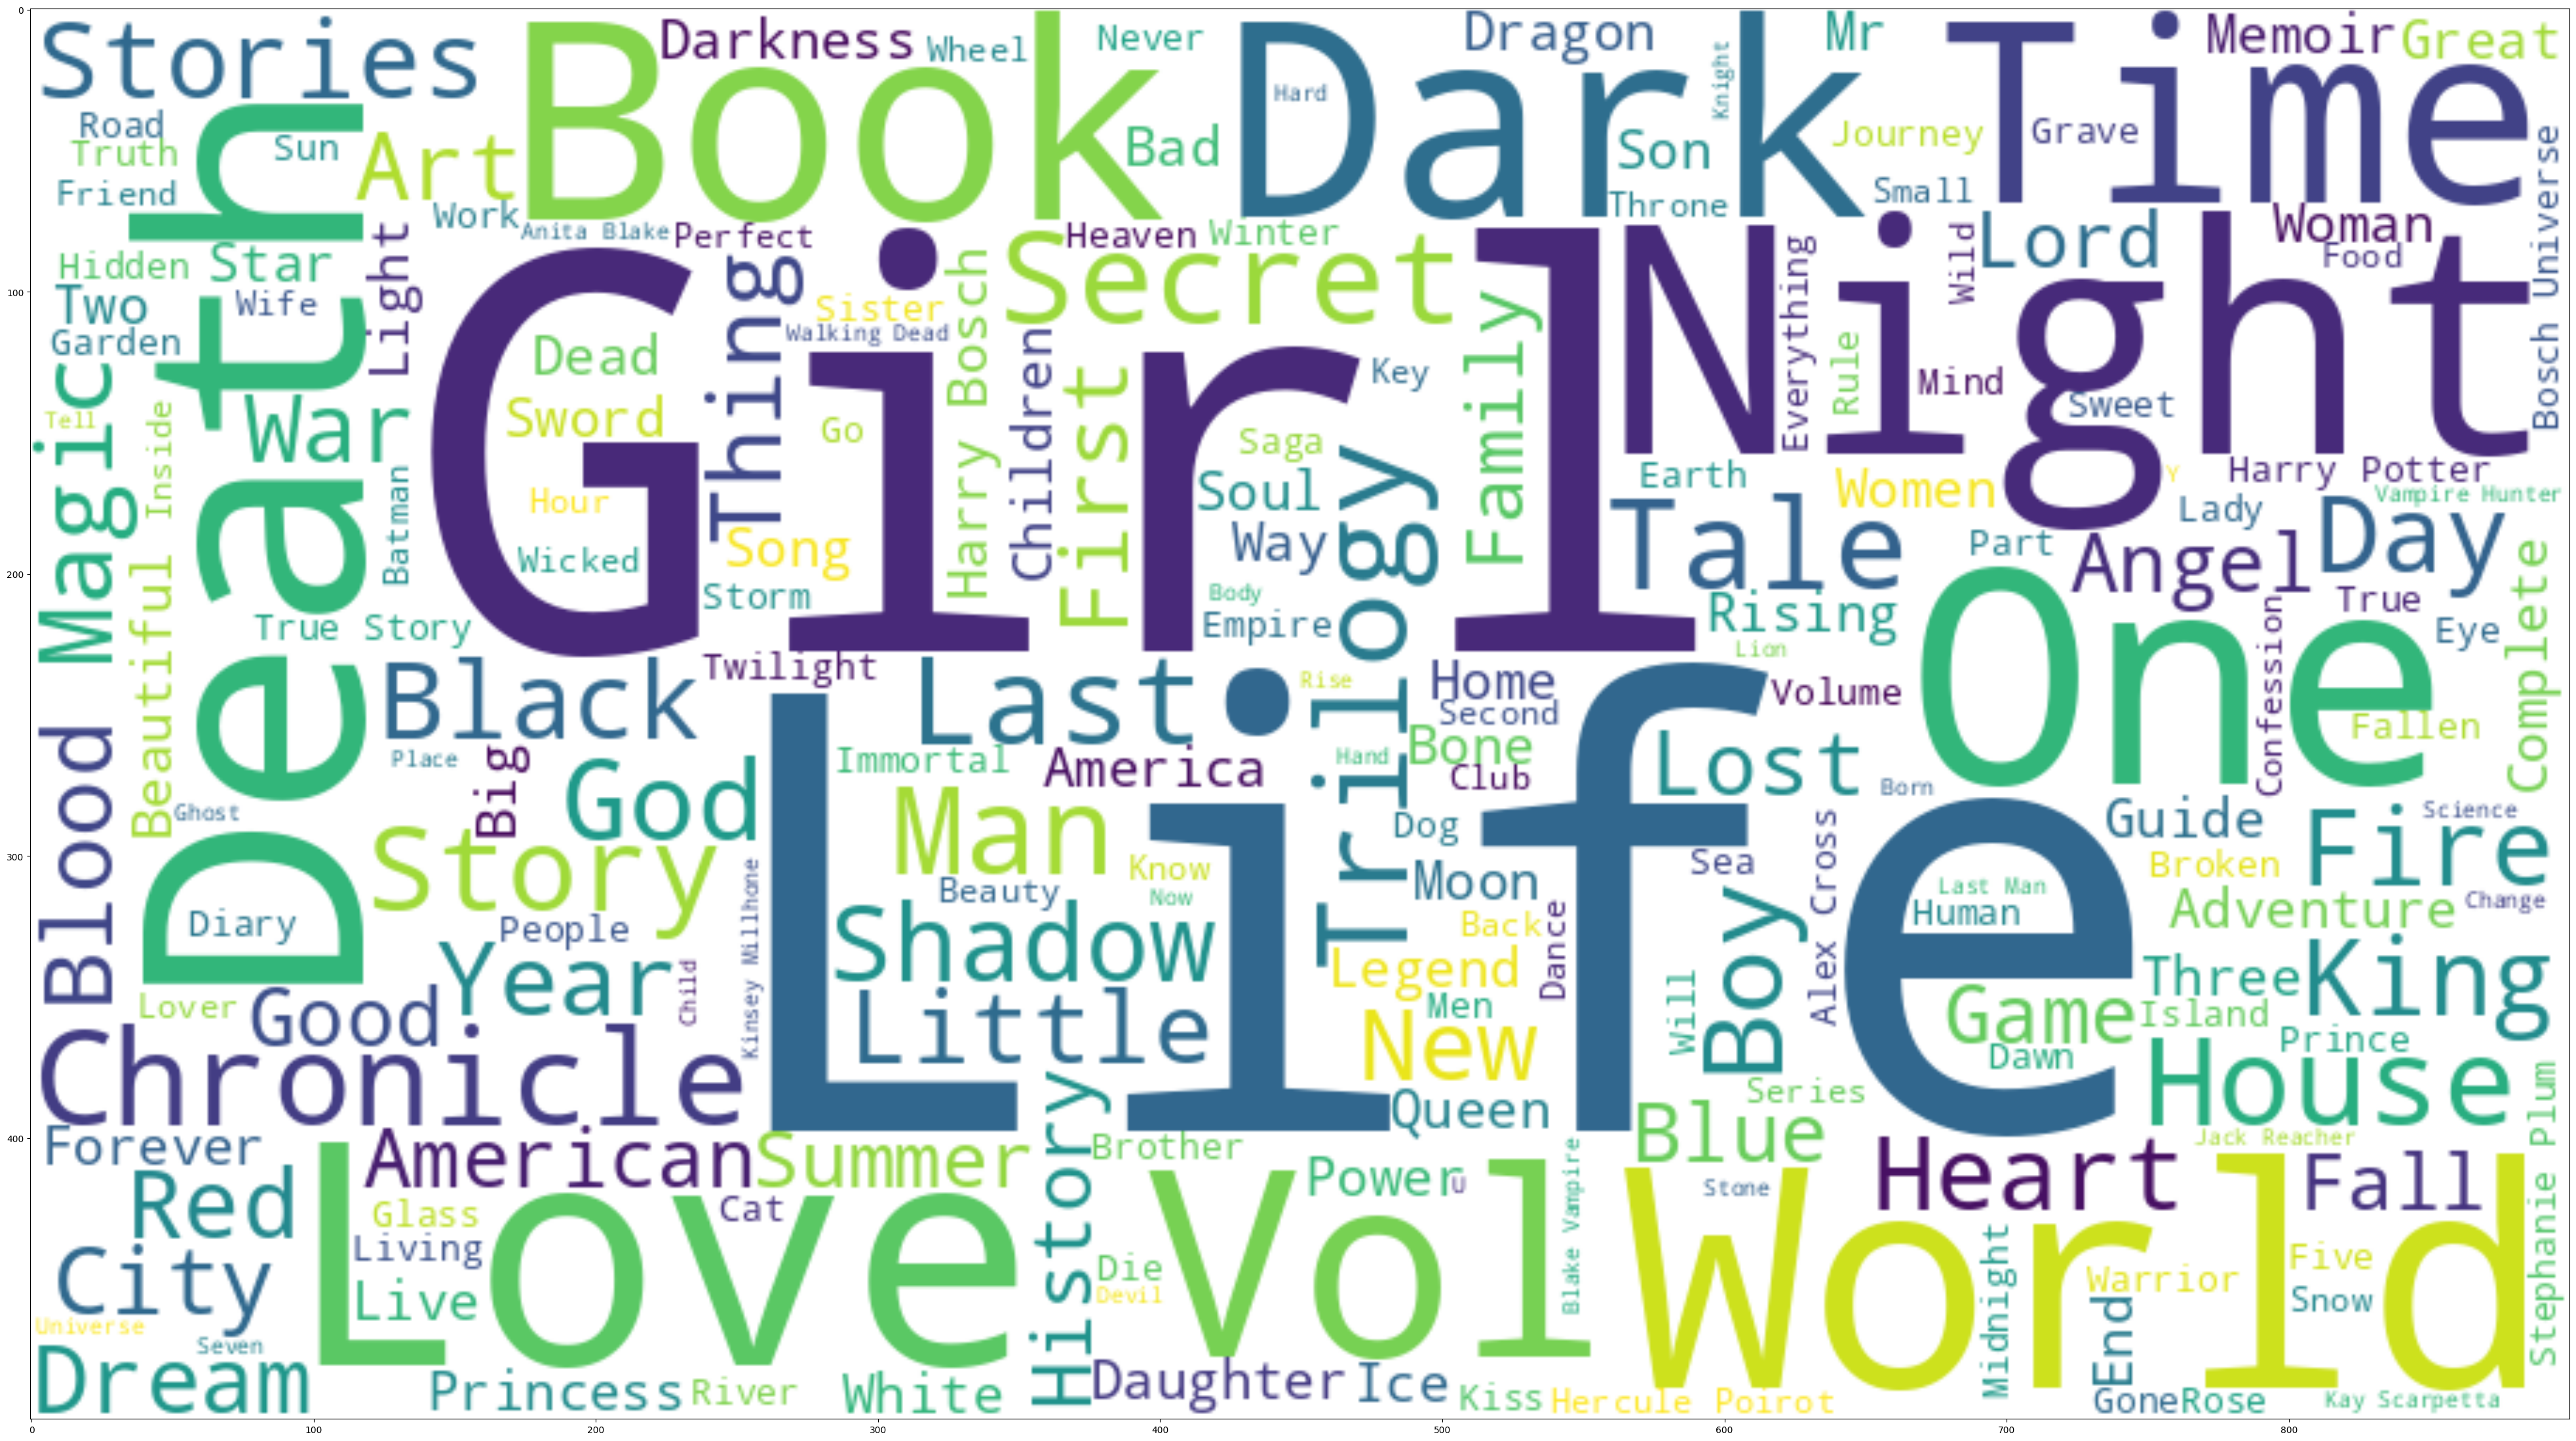

In [130]:
plt.axis('off')
plt.figure(figsize = (50, 40))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [131]:
top_authors = df.groupby(['authors']).size().sort_values(ascending=False)[:25]
top_authors = top_authors.reset_index()
top_authors.rename({0 : 'Book_counts'}, axis=1, inplace=True) 

In [132]:
top_authors 

authors  Book_counts
0          Stephen King           60
1          Nora Roberts           59
2           Dean Koontz           47
3       Terry Pratchett           42
4       Agatha Christie           39
5             Meg Cabot           37
6       James Patterson           36
7        David Baldacci           34
8             J.D. Robb           33
9          John Grisham           33
10      Janet Evanovich           30
11  Laurell K. Hamilton           30
12     Michael Connelly           29
13        John Sandford           28
14       Kristen Ashley           27
15        Tamora Pierce           26
16    Patricia Cornwell           25
17         Harlan Coben           25
18     Sherrilyn Kenyon           25
19          Sue Grafton           24
20          Jim Butcher           24
21         Jodi Picoult           23
22            Anne Rice           23
23         Rick Riordan           22
24     Charlaine Harris           22

/tmp/ipykernel_29522/4150011941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'authors', x = 'Book_counts', data = top_authors, palette='tab10')


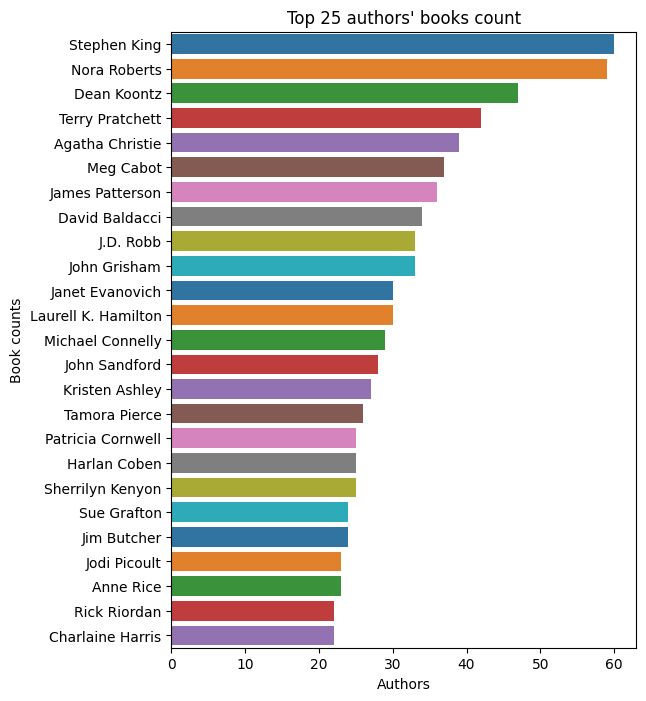

In [133]:
plt.figure(figsize = (6, 8))
sns.barplot(y = 'authors', x = 'Book_counts', data = top_authors, palette='tab10')
plt.xlabel('Authors')
plt.ylabel('Book counts')
plt.title("Top 25 authors' books count")
plt.show()

In [142]:
df['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

<Figure size 1000x600 with 0 Axes>

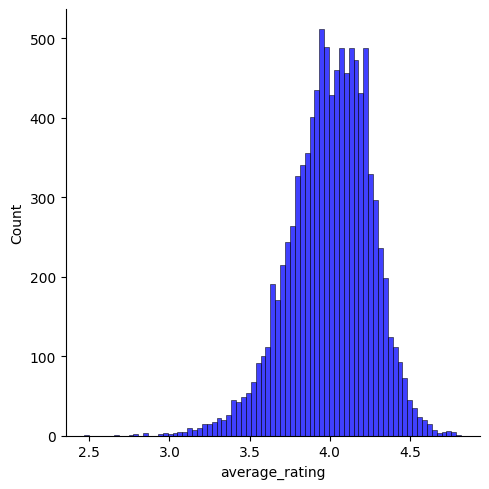

In [135]:
plt.figure(figsize=(10, 6))
sns.displot(df['average_rating'], color="b")
plt.show()

In [136]:
books = df[['book_id', 'authors',	'original_publication_year',	'original_title',	'title',	'language_code',	'average_rating',	'ratings_count']].sort_values(by= 'average_rating', ascending=False)
books = books.reset_index(drop=True)
books["original_publication_year"] = books["original_publication_year"].apply(lambda a: a * -1 if a<0 else a)
books.describe()


book_id  original_publication_year  average_rating  ratings_count
count  1.000000e+04                9979.000000    10000.000000   1.000000e+04
mean   5.264697e+06                1985.028259        4.002191   5.400124e+04
std    7.575462e+06                 105.907412        0.254427   1.573700e+05
min    1.000000e+00                   8.000000        2.470000   2.716000e+03
25%    4.627575e+04                1990.000000        3.850000   1.356875e+04
50%    3.949655e+05                2004.000000        4.020000   2.115550e+04
75%    9.382225e+06                2011.000000        4.180000   4.105350e+04
max    3.328864e+07                2017.000000        4.820000   4.780653e+06

In [137]:
books.head()

book_id                                     authors  \
0     24812                              Bill Watterson   
1  17332218                           Brandon Sanderson   
2         8                 J.K. Rowling, Mary GrandPré   
3     95602                             Francine Rivers   
4   5031805  Anonymous, Lane T. Dennis, Wayne A. Grudem   

   original_publication_year                  original_title  \
0                     2005.0  The Complete Calvin and Hobbes   
1                     2014.0               Words of Radiance   
2                     2003.0                             NaN   
3                     1993.0        Mark of the Lion Trilogy   
4                     2002.0                             NaN   

                                               title language_code  \
0                     The Complete Calvin and Hobbes           eng   
1     Words of Radiance (The Stormlight Archive, #2)           eng   
2  Harry Potter Boxed Set, Books 1-5 (Harry Potte...           eng   
3                           Mark of the Lion Trilogy         en-US   
4                                    ESV Study Bible           eng   

   average_rating  ratings_count  
0            4.82          28900  
1            4.77          73572  
2            4.77          33220  
3            4.76           9081  
4            4.76           8953

In [138]:
books.isnull().sum()

book_id                         0
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
dtype: int64

In [139]:
df_rating

book_id  user_id  rating
0             1      314       5
1             1      439       3
2             1      588       5
3             1     1169       4
4             1     1185       4
...         ...      ...     ...
981751    10000    48386       5
981752    10000    49007       4
981753    10000    49383       5
981754    10000    50124       5
981755    10000    51328       1

[981756 rows x 3 columns]

In [141]:
df_rating.groupby('user_id').size()

user_id
1         3
2         3
3         2
4         3
5         5
         ..
53420     6
53421     8
53422    18
53423     2
53424    16
Length: 53424, dtype: int64